# Lab2 - Scikit-Learn

In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

## 0. Loading Dataset

In [37]:
# read the data into datafram
data = pd.read_csv('breast_cancer.csv')

In [38]:
data.head()  # head method show only first 5 rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [39]:
# feature names as a list
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [40]:
# y includes our labels and x includes our features
y = data.diagnosis      # two labels: M = malignant, B = benign 

dropping_list = ['Unnamed: 32','id','diagnosis']
X = data.drop(dropping_list, axis = 1 )         # exclude three columns in X_feature matrix 
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [41]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [42]:
# split the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## 1. Supervised learning: classification

In [43]:
# you code here 
# 1. GaussianNB Classifier
from sklearn.naive_bayes import GaussianNB # import Gaussian Naive Bayes model
from sklearn.metrics import accuracy_score # import accuracy_score

clf = GaussianNB() # create Gaussian Naive Bayes classifier, clf is a classifier
clf.fit(X_train, y_train) # fit the classifier with training data, training data is X_train and y_train
y_pred = clf.predict(X_test) # do prediction on test data, X_test is test data, y_pred is predicted values, y_test is true values
accuracy = accuracy_score(y_test, y_pred) # get accuracy score, y_test is true values, y_pred is predicted values, accuracy is accuracy score
print(f'Prediction Accuracy: {accuracy:.2f}') # print accuracy score

Prediction Accuracy: 0.98


## 2. Unsupervised learning: dimensionality

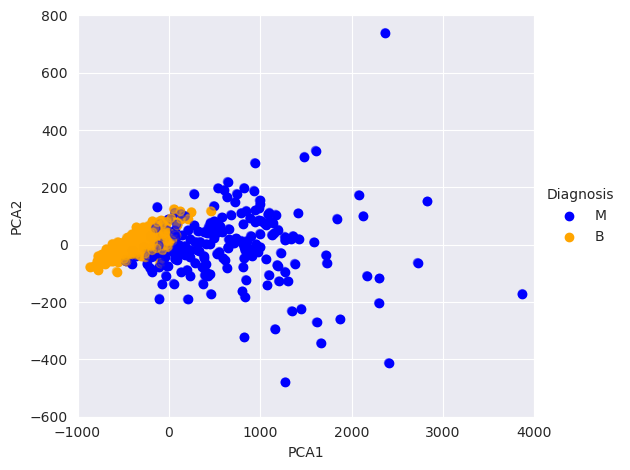

In [54]:
# you code here
# 2. PCA for Dimensionality Reduction
from sklearn.decomposition import PCA # import PCA, which is a dimensionality reduction technique for feature extraction in machine learning

sns.set_style("darkgrid")  # set the aesthetic style of the plots

pca = PCA(n_components=2) # create PCA, n_components is the number of components to keep, here I want keep 2 components
principalComponents = pca.fit_transform(X) # principalComponents is the new data after dimensionality reduction, X is the original data
principal_df = pd.DataFrame(data=principalComponents, columns=['PCA1', 'PCA2']) # principal_df is the new dataframe after dimensionality reduction, data is principalComponents, columns are PCA1 and PCA2

# Concatenate the target column 'diagnosis' with the principal components
final_df = pd.concat([principal_df, data[['diagnosis']]], axis=1) # final_df is the final dataframe after dimensionality reduction, principal_df is the new dataframe after dimensionality reduction, data[['diagnosis']] is the target column 'diagnosis', axis=1 means concatenate along columns 

# Scatter plot
colors = {'M': 'blue', 'B': 'orange'} # colors is a dictionary, 'M' is malignant, 'B' is benign, 'blue' is the color for malignant, 'orange' is the color for benign
fig, ax = plt.subplots() # create a figure and a set of subplots, fig is the figure, ax is the axes of figure
for diagnosis, color in colors.items(): # diagnosis is 'M' or 'B', color is 'blue' or 'orange'
    indices = final_df['diagnosis'] == diagnosis # indices is the indices of final_df where diagnosis is 'M' or 'B'
    ax.scatter(final_df.loc[indices, 'PCA1'], final_df.loc[indices, 'PCA2'], c=color, label=diagnosis) # scatter plot, final_df.loc[indices, 'PCA1'] is the x-axis, final_df.loc[indices, 'PCA2'] is the y-axis, c=color is the color for malignant or benign, label=diagnosis is the label for malignant or benign

ax.set_xlabel('PCA1') # set x-axis label
ax.set_ylabel('PCA2') # set y-axis label


# Set limits and ticks based on the desired box sizes
ax.set_xlim([-1000, 4000]) # set x-axis limits
ax.set_ylim([-600, 800]) # set y-axis limits


ax.grid(True)  # Add a grid
ax.set_aspect('auto')  # Set the x and y axes to the same scale
# Move the legend outside the box
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # set legend, loc='center left' means the legend is at the center left, bbox_to_anchor=(1, 0.5) means the legend is outside the box
legend.set_title("Diagnosis") # set legend title
legend.get_frame().set_facecolor('white') # set legend color
legend.get_frame().set_edgecolor('none') # set legend border edges to none
plt.tight_layout()  # Adjusts subplot params for better layout
plt.scatter(final_df['PCA1'], final_df['PCA2'], c=final_df['diagnosis'].map(colors), alpha=0.5) # scatter plot, final_df['PCA1'] is the x-axis, final_df['PCA2'] is the y-axis, c=final_df['diagnosis'].map(colors) is the color for malignant or benign, alpha=0.5 is the transparency of the points
plt.show() # show the plot
